In [1]:
from model_definition import model_initializer, solve, pprint

import pyomo.environ as pyo

import matplotlib.pyplot as plt
# Increase figure DPI
plt.rcParams['figure.dpi'] = 300

import numpy as np
from tqdm.auto import tqdm

from pyomo.opt import SolverFactory, SolverStatus, TerminationCondition

# One, Two, Three Model Optimization

## One-Model Optimization

In [2]:
model = model_initializer()

WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[1]' to a numeric
value `0` outside the bounds (0.3, 1.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[2]' to a numeric
value `0` outside the bounds (0.1, 0.5).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[3]' to a numeric
value `0` outside the bounds (0.001, 1000.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_in

### Choose the most active nanoparticle catalyst

In [3]:
model.catalyst_type.fix(2) #Pt
model.nanoparticle_diameter.fix(3) #nm
model.temperature.fix(400) #K
model.pressure.fix(100) #atm

### Maximize the process yield

#### Maximize amount of catalyst

In [4]:
model.obj = pyo.Objective(expr=model.catalyst_amount, sense=pyo.maximize)
solve(model)
pprint(model)

model.catalyst_amount.fix(model.catalyst_amount.value)

'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpgoyrv5ak.glpk.raw --wglp /tmp/tmpmruoili8.glpk.glp --cpxlp
 /tmp/tmp8j8dg_ds.pyomo.lp
Reading problem data from '/tmp/tmp8j8dg_ds.pyomo.lp'...
/tmp/tmp8j8dg_ds.pyomo.lp:50522: warning: lower bound of variable 'x66' redefined
/tmp/tmp8j8dg_ds.pyomo.lp:50522: warning: upper bound of variable 'x66' redefined
9239 rows, 822 columns, 21972 non-zeros
757 integer variables, all of which are binary
51279 lines were read
Writing problem data to '/tmp/tmpmruoili8.glpk.glp'...
41295 lines were written
GLPK Integer Optimizer 5.0
9239 rows, 822 columns, 21972 non-zeros
757 integer variables, all of which are binary
Preprocessing...
134 constrai

In [5]:
model.pellet_effectiveness_factor.fix(1)
#model.temperature.fix(400)
#model.pressure.fix(100)
model.cstr_volume.fix(2)

### Optimize for cost

In [6]:
model.obj = pyo.Objective(expr=model.cost, sense=pyo.minimize)
solve(model)
pprint(model)

'pyomo.core.base.objective.ScalarObjective'>) on block unknown with a new
Component (type=<class 'pyomo.core.base.objective.ScalarObjective'>). This is
usually indicative of a modelling error. To avoid this warning, use
block.del_component() and block.add_component().
GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpnbuaapy8.glpk.raw --wglp /tmp/tmplv7s_ors.glpk.glp --cpxlp
 /tmp/tmpjeapctoi.pyomo.lp
Reading problem data from '/tmp/tmpjeapctoi.pyomo.lp'...
/tmp/tmpjeapctoi.pyomo.lp:50512: warning: lower bound of variable 'x63' redefined
/tmp/tmpjeapctoi.pyomo.lp:50512: warning: upper bound of variable 'x63' redefined
9239 rows, 819 columns, 21965 non-zeros
757 integer variables, all of which are binary
51269 lines were read
Writing problem data to '/tmp/tmplv7s_ors.glpk.glp'...
41288 lines were written
GLPK Integer Optimizer 5.0
9239 rows, 819 columns, 21965 non-zeros
757 integer variables, all of which are binary
Preprocessing...
14 constrain

In [7]:
one_model_opt_cost = model.cost.value

print(f"Final cost: ${model.cost.value:.2f} / kg H2")

Final cost: $23.32 / kg H2


## Two-Model Optimization

In [8]:
model = model_initializer()

WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[1]' to a numeric
value `0` outside the bounds (0.3, 1.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[2]' to a numeric
value `0` outside the bounds (0.1, 0.5).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[3]' to a numeric
value `0` outside the bounds (0.001, 1000.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_in

### Choose the most active nanoparticle catalyst

In [9]:
model.catalyst_type.fix(2) #Pt
model.nanoparticle_diameter.fix(3) #nm
#model.temperature.fix(400) #K
#model.pressure.fix(100) #atm

### Minimize cost

In [10]:
solve(model)
pprint(model)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmpamvrkkmv.glpk.raw --wglp /tmp/tmpxirv4hwf.glpk.glp --cpxlp
 /tmp/tmp9w4vfwet.pyomo.lp
Reading problem data from '/tmp/tmp9w4vfwet.pyomo.lp'...
/tmp/tmp9w4vfwet.pyomo.lp:50528: warning: lower bound of variable 'x68' redefined
/tmp/tmp9w4vfwet.pyomo.lp:50528: warning: upper bound of variable 'x68' redefined
9239 rows, 824 columns, 21976 non-zeros
757 integer variables, all of which are binary
51285 lines were read
Writing problem data to '/tmp/tmpxirv4hwf.glpk.glp'...
41299 lines were written
GLPK Integer Optimizer 5.0
9239 rows, 824 columns, 21976 non-zeros
757 integer variables, all of which are binary
Preprocessing...
316 constraint coefficient(s) were reduced
978 rows, 207 columns, 3230 non-zeros
165 integer variables, all of which are binary
Scaling...
 A: min|aij| =  7.276e-12  max|aij| =  2.425e+04  ratio =  3.333e+15
GM: min|aij| =  3.582e-04  max|aij| =  2.792e+03  ratio =  7.793e+06
EQ: 

In [11]:
two_model_opt_cost = model.cost.value

print(f"Final cost: ${model.cost.value:.2f} / kg H2")

Final cost: $16.20 / kg H2


## Three-Model Optimization

In [12]:
model = model_initializer()

WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[1]' to a numeric
value `0` outside the bounds (0.3, 1.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[2]' to a numeric
value `0` outside the bounds (0.1, 0.5).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[3]' to a numeric
value `0` outside the bounds (0.001, 1000.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_in

In [13]:
solve(model)
pprint(model)

GLPSOL--GLPK LP/MIP Solver 5.0
Parameter(s) specified in the command line:
 --write /tmp/tmp0p0ji5qy.glpk.raw --wglp /tmp/tmpq48vsdwd.glpk.glp --cpxlp
 /tmp/tmpv01sq4s6.pyomo.lp
Reading problem data from '/tmp/tmpv01sq4s6.pyomo.lp'...
/tmp/tmpv01sq4s6.pyomo.lp:50535: warning: lower bound of variable 'x70' redefined
/tmp/tmpv01sq4s6.pyomo.lp:50535: warning: upper bound of variable 'x70' redefined
9239 rows, 826 columns, 21979 non-zeros
758 integer variables, 757 of which are binary
51292 lines were read
Writing problem data to '/tmp/tmpq48vsdwd.glpk.glp'...
41303 lines were written
GLPK Integer Optimizer 5.0
9239 rows, 826 columns, 21979 non-zeros
758 integer variables, 757 of which are binary
Preprocessing...
937 constraint coefficient(s) were reduced
4415 rows, 659 columns, 14184 non-zeros
600 integer variables, 599 of which are binary
Scaling...
 A: min|aij| =  7.276e-12  max|aij| =  7.801e+06  ratio =  1.072e+18
GM: min|aij| =  9.827e-05  max|aij| =  1.018e+04  ratio =  1.035e+08
EQ

In [14]:
three_model_opt_cost = model.cost.value

print(f"Final cost: ${model.cost.value:.2f} / kg H2")

Final cost: $14.01 / kg H2


## Final Results

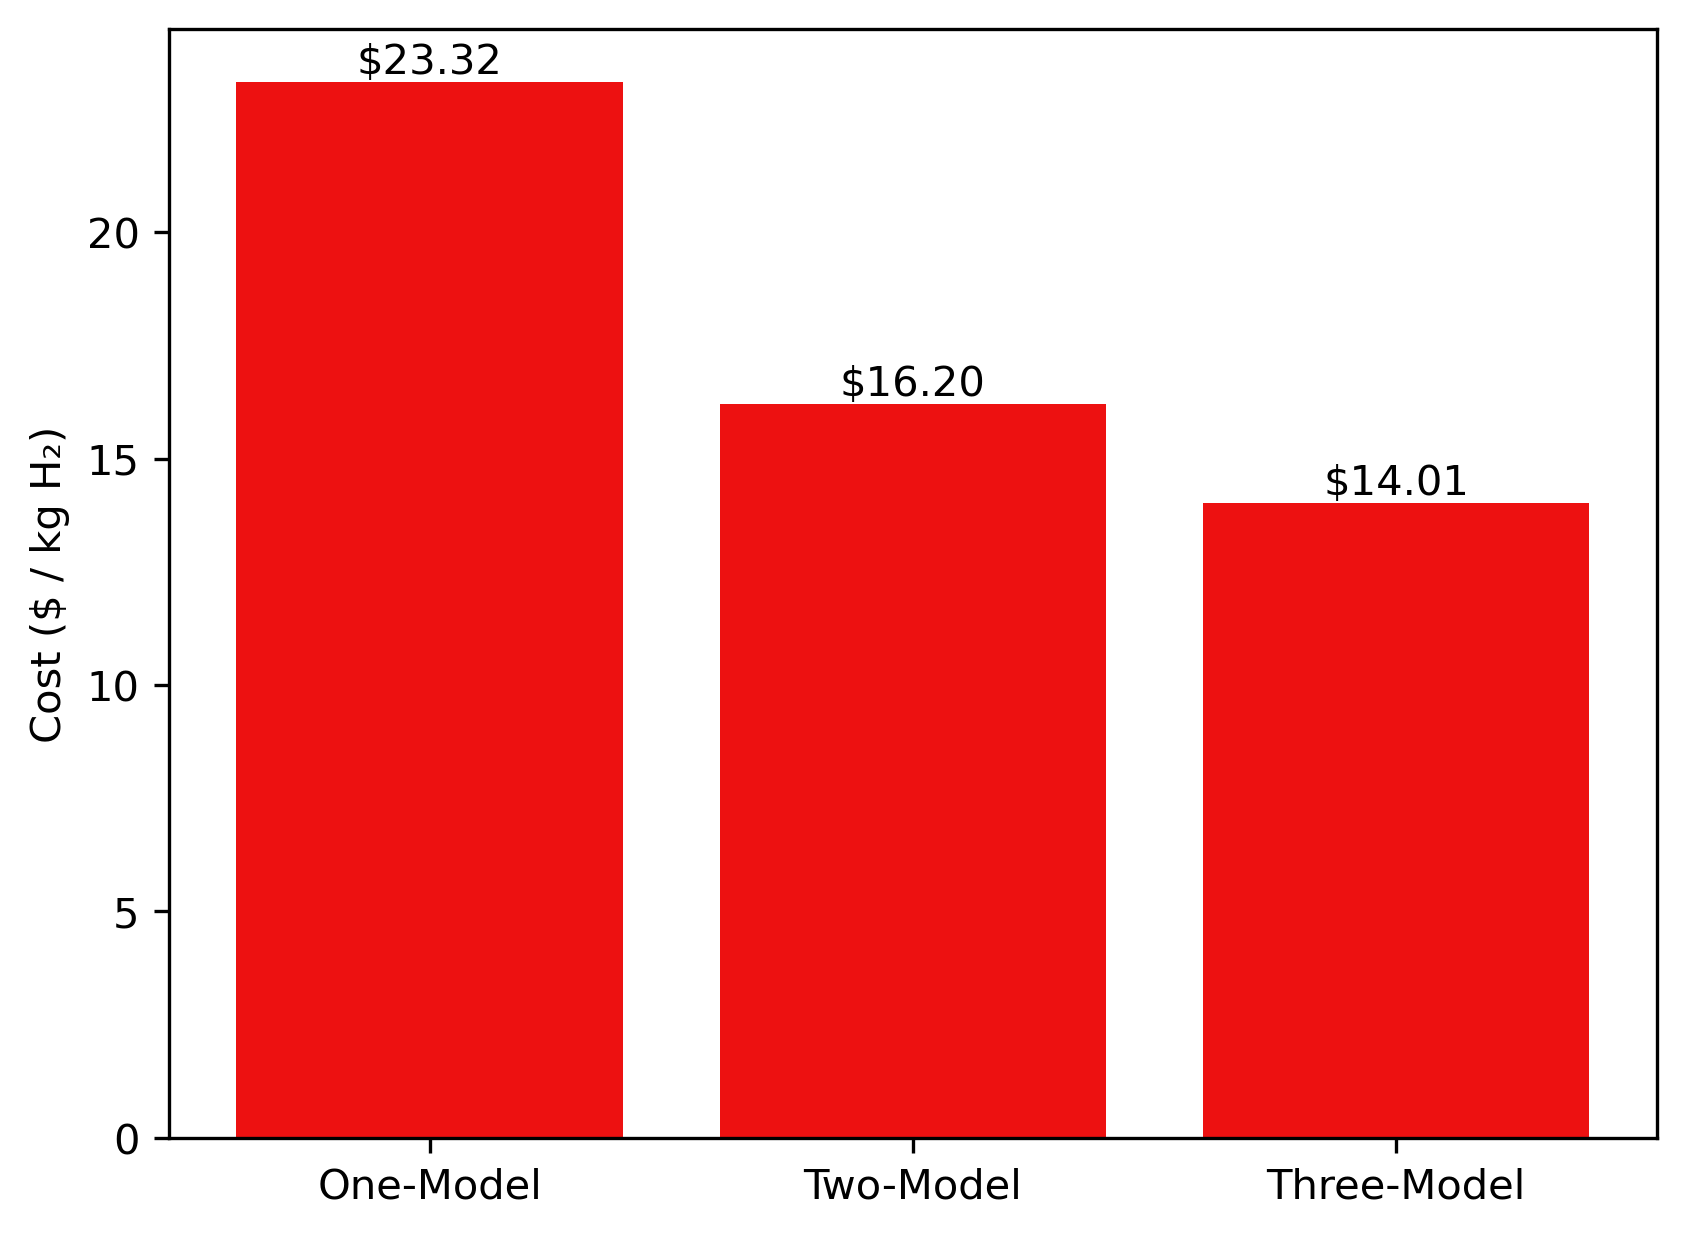

In [20]:
plt.bar([1, 2, 3], [one_model_opt_cost, two_model_opt_cost, three_model_opt_cost], color = '#ed1111')
plt.xticks([1, 2, 3], ["One-Model", "Two-Model", "Three-Model"])
plt.ylabel("Cost ($ / kg H₂)")

plt.gca().bar_label(plt.gca().containers[0], fmt="$%.2f")

plt.show()

# Economy of Scale Effect

In [18]:
Pt_costs = []
Pd_costs = []
Cu_costs = []

capacity_list = np.linspace(100, 1500, 30)
solver = SolverFactory('glpk')

model = model_initializer()

model.catalyst_type.fix(2) #Pt
for capacity in tqdm(capacity_list):
    model.station_capacity.fix(capacity)
    solution = solver.solve(model, tee = False)
    if solution.solver.termination_condition is TerminationCondition.optimal:
        Pt_costs.append(model.cost.value)
    else:
        Pt_costs.append(None)

model.catalyst_type.fix(0) #Pd
for capacity in tqdm(capacity_list):
    model.station_capacity.fix(capacity)
    solution = solver.solve(model, tee = False)
    if solution.solver.termination_condition == TerminationCondition.optimal:
        Pd_costs.append(model.cost.value)
    else:
        Pd_costs.append(None)
    Pd_costs = Pd_costs

model.catalyst_type.fix(1) #Cu
for capacity in tqdm(capacity_list):
    model.station_capacity.fix(capacity)
    solution = solver.solve(model, tee = False)
    if solution.solver.termination_condition == TerminationCondition.optimal:
        Cu_costs.append(model.cost.value)
    else:
        Cu_costs.append(None)

WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[0]' to a numeric
value `0` outside the bounds (0.1, 2.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[1]' to a numeric
value `0` outside the bounds (0.3, 1.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[2]' to a numeric
value `0` outside the bounds (0.1, 0.5).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_inputs[3]' to a numeric
value `0` outside the bounds (0.001, 1000.0).
    See also https://pyomo.readthedocs.io/en/stable/errors.html#w1002
WARNING (W1002): Setting Var 'component_block.scaled_in

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

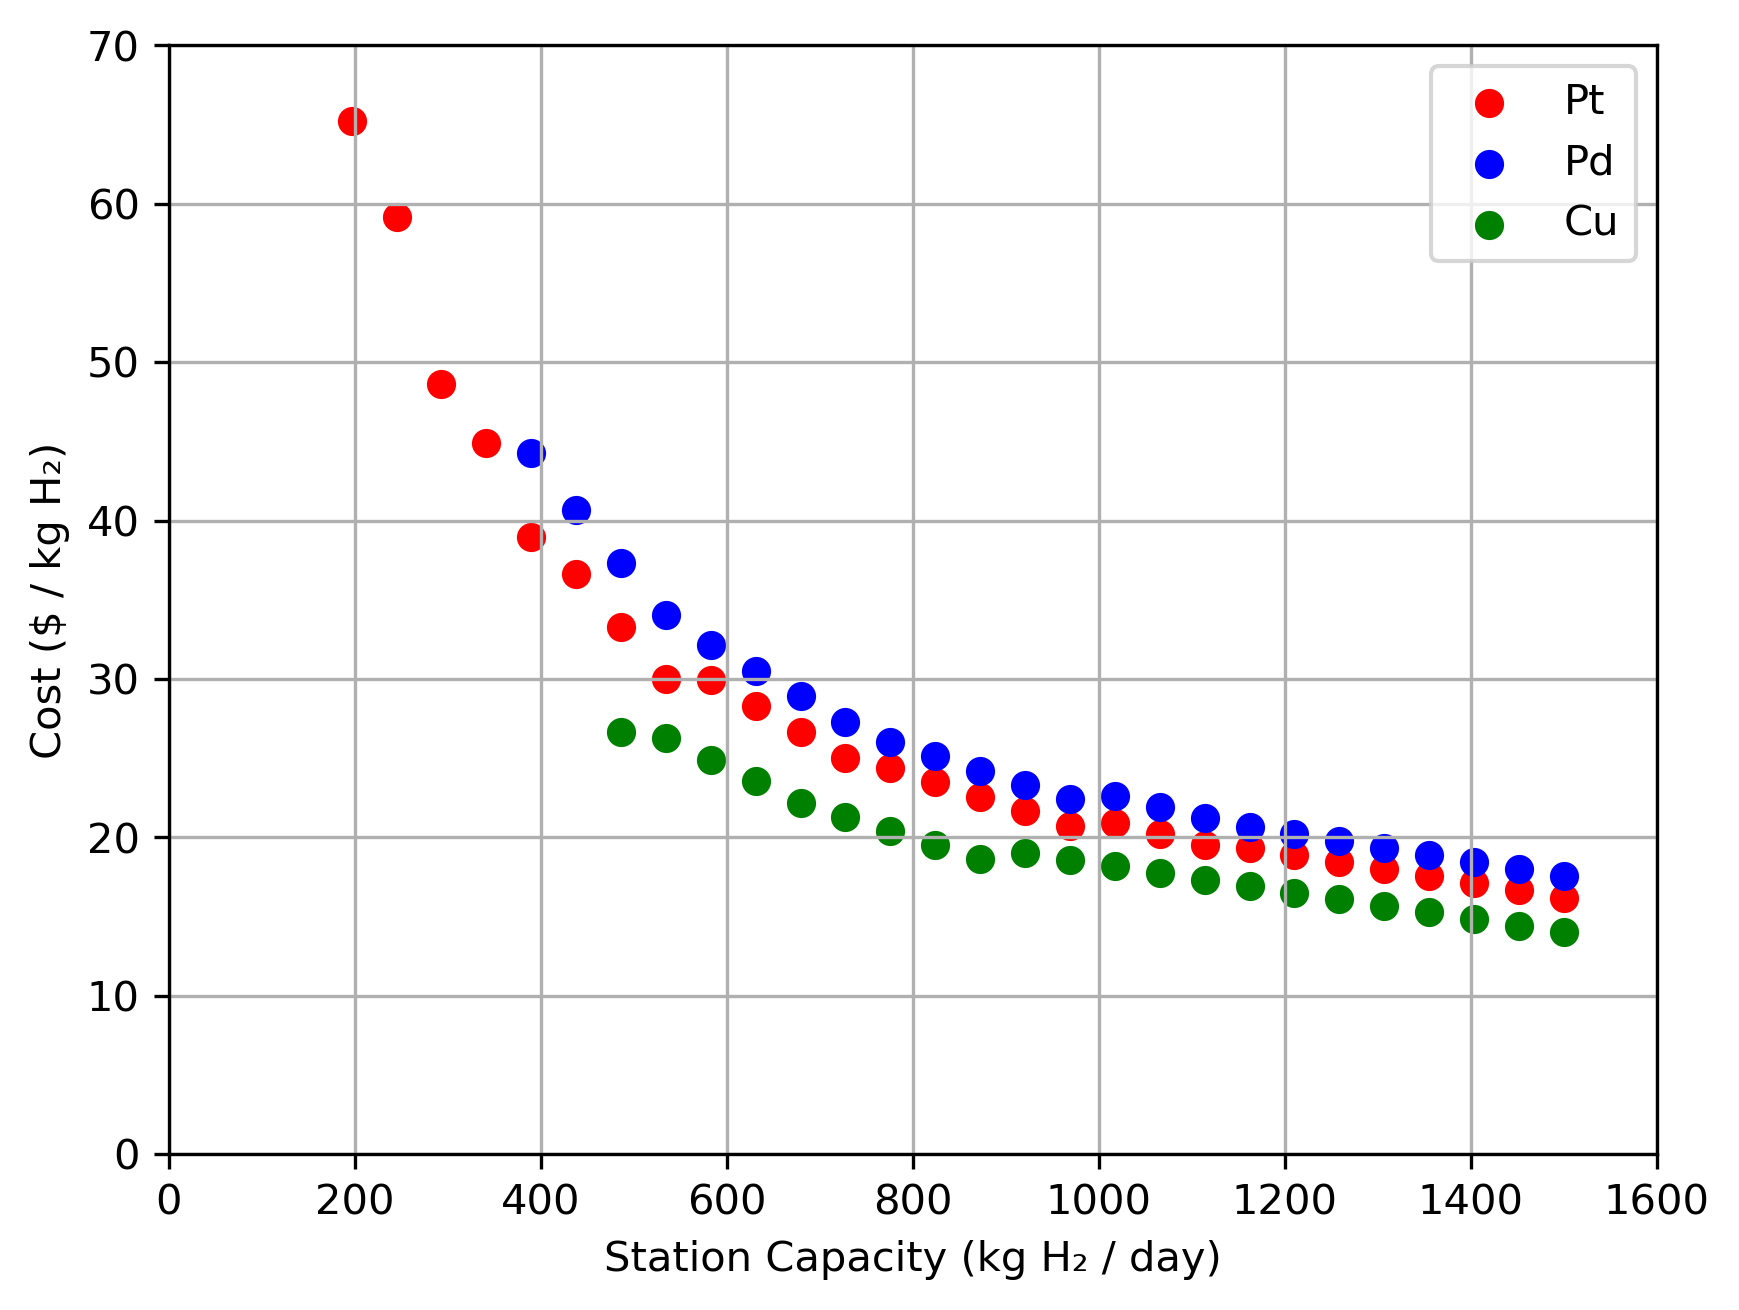

In [19]:
plt.scatter(capacity_list, Pt_costs, label="Pt", color="red")
plt.scatter(capacity_list, Pd_costs, label="Pd", color="blue")
plt.scatter(capacity_list, Cu_costs, label="Cu", color="green")
plt.xlim(0, 1600)
plt.ylim(0, 70)
plt.xlabel("Station Capacity (kg H₂ / day)")
plt.ylabel("Cost ($ / kg H₂)")
plt.grid()
plt.legend()
plt.show()